In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/mac/Downloads/aspiring_minds_employability_outcomes_2015.xlsx')

## Getting familiar with the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [9]:
pd.set_option('display.max_columns',38)
df.head(5)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [11]:
#clean the column names
df.rename(columns={'10board':'Grade10_board','12graduation':'Graduation_year','12percentage':'Graduation_marks','12board':'Graduation_board','10percentage':'Grade10_marks'}, inplace=True)

In [22]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', 'Grade10_marks', 'Grade10_board', 'Graduation_year',
       'Graduation_marks', 'Graduation_board', 'CollegeID', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [24]:
#drop the irrelevant columns
df=df.drop('Unnamed: 0',axis=1)

In [25]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,Grade10_marks,Grade10_board,Graduation_year,Graduation_marks,Graduation_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [32]:
#check for duplicates
df.duplicated().any()

False

In [44]:
#handling inconsistencies in Designation Column 
df['Designation'].replace(['software engineer','software developer','java software engineer','senior software engineer','java developer','web developer', 'application developer','associate software engineer','programmer','.net developer','asp.net developer','senior software developer','ios developer','junior software engineer','web application developer','junior software developer','senior .net developer','front end web developer','senior java developer', 'sql developer', 'senior php developer','.net web developer','game developer','front end developer','html developer','software engineer associate','c# developer','associate developer','it developer','software engg','dotnet developer','software eng','junior .net developer','software devloper','trainee software developer','senior developer','python developer','full stack developer','software engineere'],'software developer',inplace=True)

In [57]:
mask= df['Designation'].str.contains('analyst')
df.loc[mask, 'Designation']='analyst'

In [59]:
df['Designation'].replace(['software enginner','software programmer','senior web developer','developer','senior programmer','software trainee engineer','jr.software developer', 'embedded software engineer', 'trainee software engineer','assistant software engineer','jr software engineer','software programmer','software engineering associate','associate software engg','senior programmer'],'software developer', inplace=True)

In [61]:
df['Designation'].replace(['system engineer', 'systems engineer', 'senior systems engineer','assistant system engineer'],'system engineer', inplace=True)

In [62]:
df['Designation'].replace(['software test engineer','test engineer', 'software test engineerte','software test engineer (etl)', 'associate test engineer'],'software test engineer', inplace= True)

In [70]:
designation_count=df['Designation'].value_counts()
designation_count[:20]

software developer                   1440
analyst                               412
system engineer                       381
software test engineer                160
project engineer                       77
technical support engineer             76
assistant manager                      52
network engineer                       51
engineer                               47
android developer                      46
php developer                          33
production engineer                    29
design engineer                        28
electrical engineer                    23
application engineer                   22
system administrator                   20
lecturer                               20
management trainee                     19
senior engineer                        18
software quality assurance tester      17
Name: Designation, dtype: int64

In [71]:
#drop columns with a -1
df['JobCity'].replace(-1,np.nan,inplace=True)
df['JobCity'].dropna(inplace=True)

In [73]:
jobcity_count=df['JobCity'].value_counts()
jobcity_count[:20]

Bangalore        627
Noida            368
Hyderabad        335
Pune             290
Chennai          272
Gurgaon          198
New Delhi        196
Mumbai           108
Kolkata           98
Jaipur            46
Lucknow           36
Mysore            36
Navi Mumbai       32
chennai           27
pune              26
Greater Noida     26
Chandigarh        26
Indore            24
Bhubaneswar       22
Coimbatore        20
Name: JobCity, dtype: int64

In [75]:
df['Grade10_marks'].describe()

count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: Grade10_marks, dtype: float64

In [82]:
#handling inconsistencies in the Grade10 board
df['Grade10_board'].replace(['board ofsecondary education,ap', 'andhra pradesh','board of secondary education,andhara pradesh','andhra pradesh board ssc','board of secondary education, andhra pradesh','board of secondary education,andhra pradesh','school secondary education, andhra pradesh','andhra pradesh state board','ap state board','school secondary education, andhra pradesh','andhra pradesh state board','ap state board','board of secondary education - andhra pradesh','ap state board for secondary education','board of ssc education andhra pradesh'],'board of secondary education, andhra pradesh',inplace=True)

In [83]:
df['Grade10_board'].replace(['board secondary  education','board secondary  education','board of secondary education','state board of secondary education( ssc)','state','board of ssc','ssc','bse(board of secondary education)','state board ','state bord','board of  secondary education'],'board of secondary education', inplace=True)

In [86]:
df['Grade10_board'].replace(['uttar pradesh board','up board','upboard','up','up baord','up borad','u p','up bourd','up-board','u p board'], 'uttar pradesh board',inplace= True)

In [84]:
df['Grade10_board'].replace(['karnataka state secondary education board','karnataka secondary education board','karnataka board of secondary education','karantaka secondary education and examination borad','kseeb(karnataka secondary education examination board)','state(karnataka board)','karnataka secondary education examination board','karnataka education board','karnataka sslc board bangalore','karnataka','karnataka secondary board','karnataka board of higher education','karnataka secondary eduction','karnataka education board (keeb)'],'karnataka secondary education board', inplace= True)

In [91]:
df['Grade10_board'].replace(0,np.nan,inplace=True)
df['Grade10_board'].dropna(inplace=True)

In [92]:
df['Grade10_board'].replace('cbse','central board of secondary education', inplace=True)

In [97]:
df['Grade10_board'].replace('icse','indian certificate of secondary education', inplace=True)

In [99]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,Grade10_marks,Grade10_board,Graduation_year,Graduation_marks,Graduation_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Designstion
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board of secondary education, andhra pradesh",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,NaN
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,central board of secondary education,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,NaN
2,810601,325000,2014-06-01,present,system engineer,Chennai,f,1992-08-03,85.0,central board of secondary education,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,NaN
3,267447,1100000,2011-07-01,present,software developer,Gurgaon,m,1989-12-05,85.6,central board of secondary education,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,NaN
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,central board of secondary education,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,NaN


In [101]:
graduation_board=df['Graduation_board'].value_counts()
graduation_board[:10]

cbse                               1400
state board                        1254
0                                   359
icse                                129
up board                             87
isc                                  45
board of intermediate                36
board of intermediate education      31
up                                   20
rbse                                 19
Name: Graduation_board, dtype: int64

In [102]:
df['Graduation_board'].replace(0,np.nan,inplace=True)
df['Graduation_board'].dropna(inplace=True)

In [103]:
graduation_board=df['Graduation_board'].value_counts()
graduation_board[:10]

cbse                               1400
state board                        1254
icse                                129
up board                             87
isc                                  45
board of intermediate                36
board of intermediate education      31
up                                   20
rbse                                 19
mp board                             17
Name: Graduation_board, dtype: int64

In [104]:
df['Graduation_board'].replace('cbse','central board of secondary education', inplace= True)

In [105]:
df['Graduation_board'].replace('icse','indian certificate of secondary education', inplace= True)

In [106]:
df['Graduation_board'].replace('isc','indian school certificate', inplace= True)

In [108]:
graduation_board=df['Graduation_board'].value_counts()
graduation_board[:5]

central board of secondary education         1412
state board                                  1254
indian certificate of secondary education     129
up board                                       87
indian school certificate                      45
Name: Graduation_board, dtype: int64

Columns to be analyzed

ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,Grade10_marks,Grade10_board,Graduation_year,Graduation_marks,Graduation_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain

In [111]:
df1=df[['ID','Salary','DOJ','DOL','Designation','JobCity','Gender','DOB','Grade10_marks','Grade10_board','Graduation_year','Graduation_marks','Graduation_board','CollegeID','CollegeTier','Degree','Specialization','collegeGPA','CollegeCityID','CollegeCityTier','CollegeState','GraduationYear','English','Logical','Quant','Domain']]

## Exploratory Analysis

### Univariate Analysis

In [112]:
df1.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,Grade10_marks,Grade10_board,Graduation_year,Graduation_marks,Graduation_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board of secondary education, andhra pradesh",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,central board of secondary education,2007,85.0,central board of secondary education,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603
2,810601,325000,2014-06-01,present,system engineer,Chennai,f,1992-08-03,85.0,central board of secondary education,2010,68.2,central board of secondary education,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877
3,267447,1100000,2011-07-01,present,software developer,Gurgaon,m,1989-12-05,85.6,central board of secondary education,2007,83.6,central board of secondary education,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,central board of secondary education,2008,76.8,central board of secondary education,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502


### Analysis On Salary

In [113]:
df1['Salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

In [320]:
df1['Salary'].median()

300000.0

<AxesSubplot:>

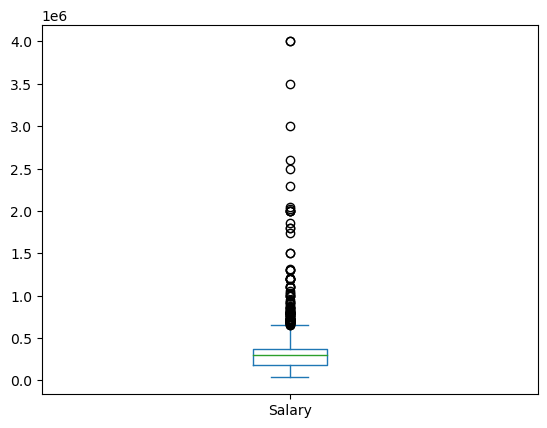

In [116]:
df1['Salary'].plot(kind='box')

In [119]:
salary_df=df1['Salary']< 1.51e6
filtered_df = df1[salary_df]


<AxesSubplot:>

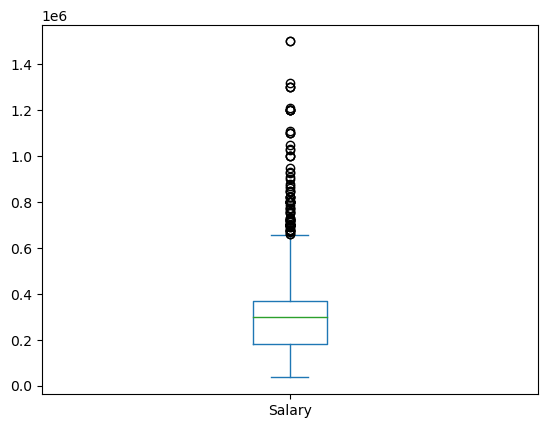

In [120]:
filtered_df['Salary'].plot(kind='box')

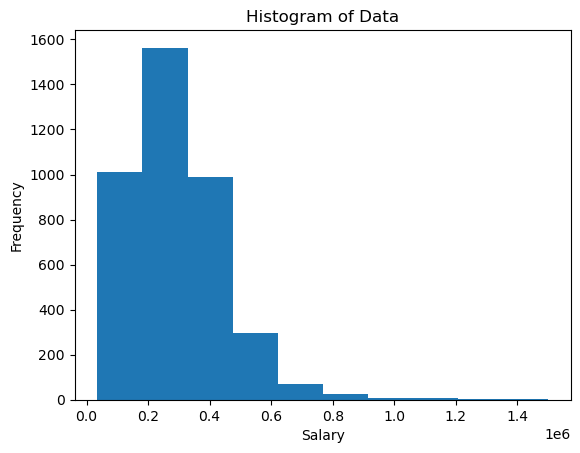

In [127]:
import matplotlib.pyplot as plt
plt.hist(filtered_df['Salary'], bins=10)

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

plt.show()


There are presence of many outliers in the salary column as expected,this could be due to years of experience,job designation,location or other factors, but the mean salary received is about 307,600 Indian Rupees

### Percentage Marks in Grade 10

In [121]:
df1['Grade10_marks'].describe()

count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: Grade10_marks, dtype: float64

<AxesSubplot:>

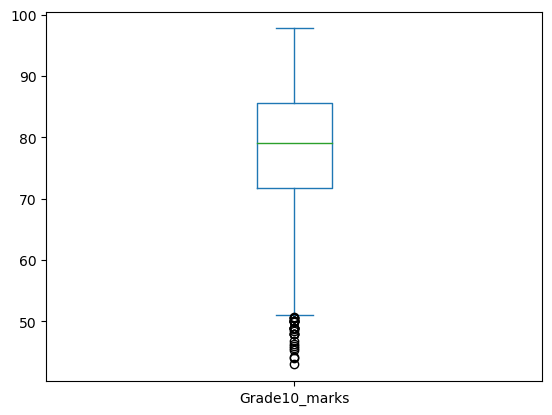

In [122]:
df1['Grade10_marks'].plot(kind='box')

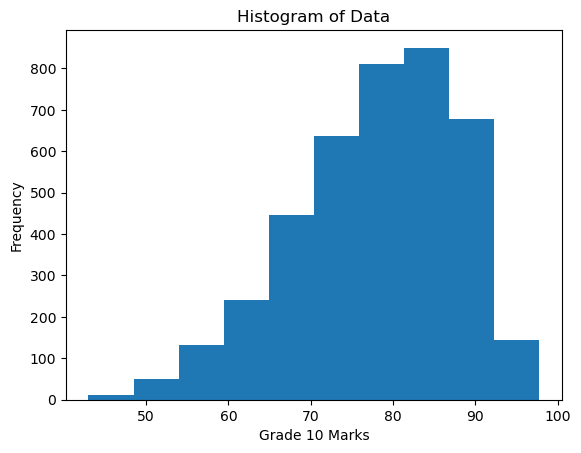

In [128]:
plt.hist(df1['Grade10_marks'], bins=10)

plt.xlabel('Grade 10 Marks')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

plt.show()

Most of the student's 'Grade 10' percntage grade falls between 65% to 95%, this could be an indication of a high pass percentage

### Percentage Marks In Graduation Year

In [129]:
df1['Graduation_marks'].describe()

count    3998.000000
mean       74.466366
std        10.999933
min        40.000000
25%        66.000000
50%        74.400000
75%        82.600000
max        98.700000
Name: Graduation_marks, dtype: float64

<AxesSubplot:>

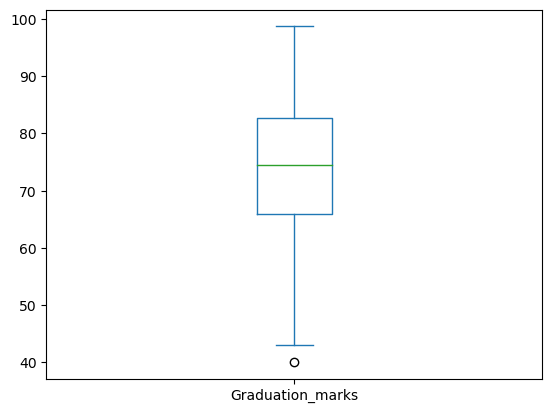

In [130]:
df1['Graduation_marks'].plot(kind='box')

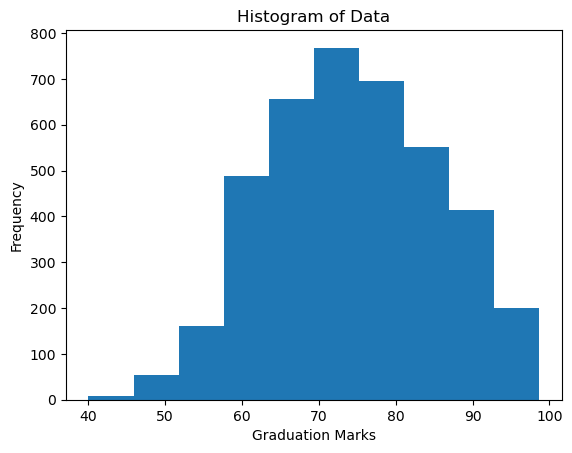

In [131]:
plt.hist(df1['Graduation_marks'], bins=10)


plt.xlabel('Graduation Marks')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

plt.show()

The results in the Graduation year look similar to that of the Grade 10, a lot of the percentage grades fall between 60 to 90% with an average of 74%

### College Tier

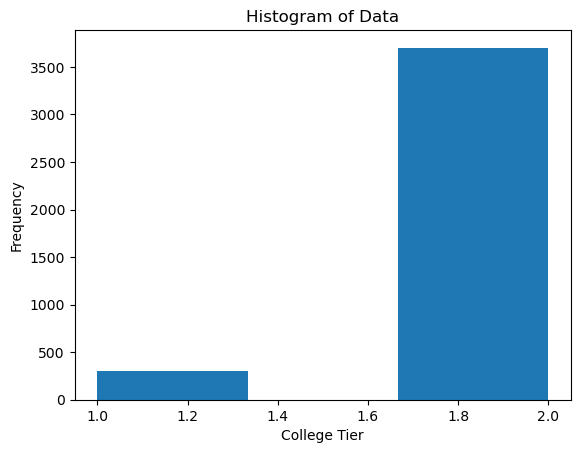

In [136]:
plt.hist(df1['CollegeTier'], bins=3)

plt.xlabel('College Tier')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

plt.show()

Less than 500 colleges are in tier 1, the others are in the 2nd tier, this indicates less high quality colleges

### College GPA

In [138]:
df1['collegeGPA'].describe()

count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegeGPA, dtype: float64

<AxesSubplot:>

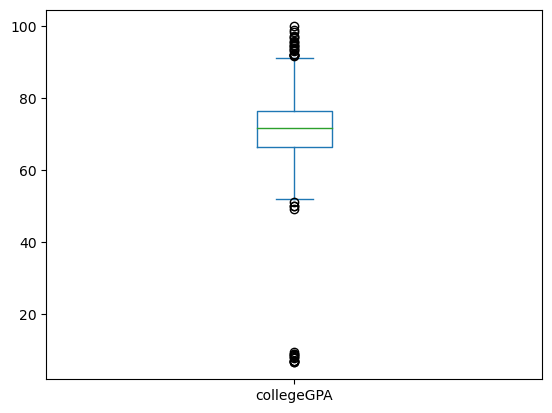

In [137]:
df1['collegeGPA'].plot(kind='box')

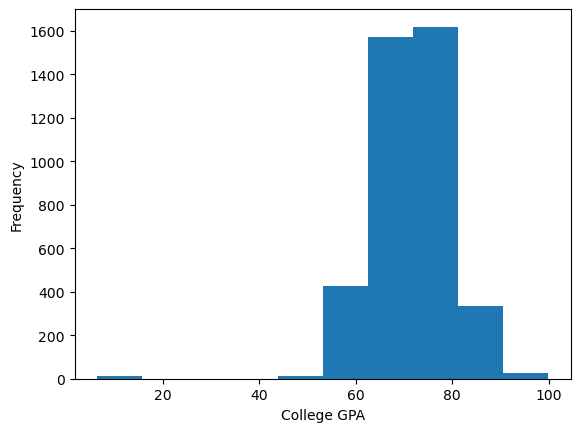

In [141]:
plt.hist(df1['collegeGPA'], bins=10)

plt.xlabel('College GPA')
plt.ylabel('Frequency')

plt.show()

In [139]:
College_GPA=df1['collegeGPA']>40
filtered_college_gpa = df1[College_GPA]

<AxesSubplot:>

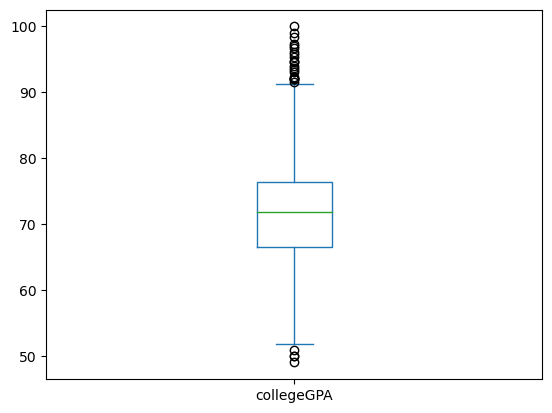

In [140]:
filtered_college_gpa['collegeGPA'].plot(kind='box')

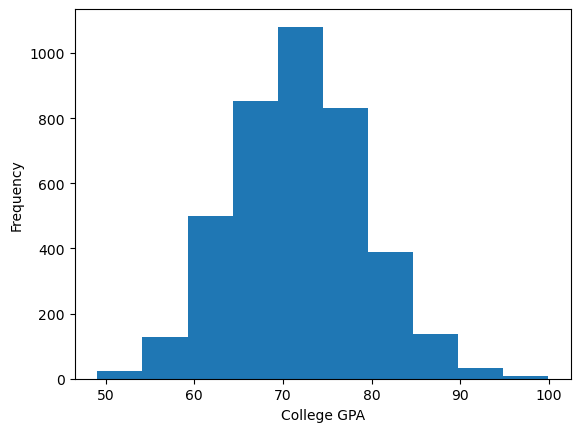

In [142]:
plt.hist(filtered_college_gpa['collegeGPA'], bins=10)

plt.xlabel('College GPA')
plt.ylabel('Frequency')

plt.show()

About 25% of the college students, have a GPA percenatage less than 66, while the other 75% have GPA between 66% and 98%

### English Grades

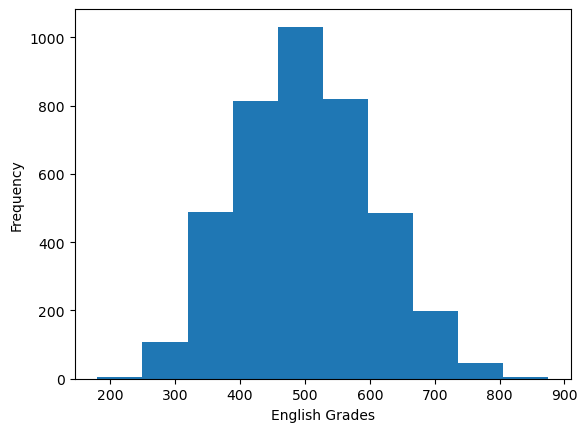

In [145]:
plt.hist(df1['English'], bins=10)

plt.xlabel('English Grades')
plt.ylabel('Frequency')

plt.show()

The grades distribution are normalized, '500' are the most frequently occuring grades in the distribution

### Logic Grades

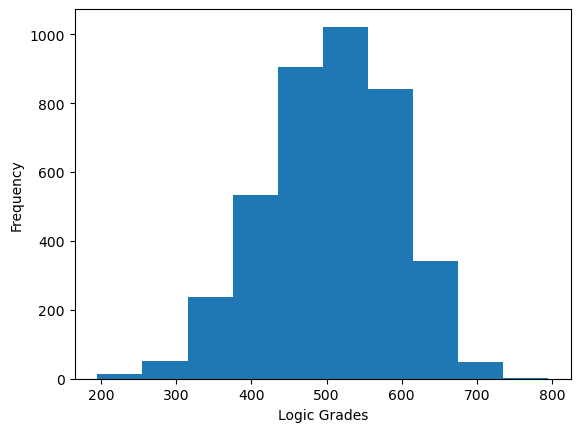

In [146]:
plt.hist(df1['Logical'], bins=10)

plt.xlabel('Logic Grades')
plt.ylabel('Frequency')

plt.show()

### Quant Grades

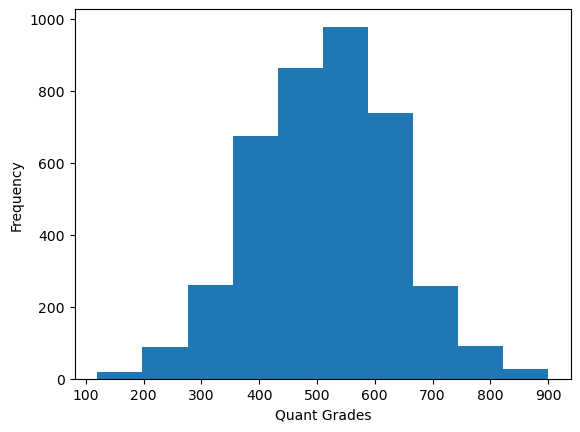

In [147]:
plt.hist(df1['Quant'], bins=10)

plt.xlabel('Quant Grades')
plt.ylabel('Frequency')

plt.show()

### Job City

In [171]:
count=df['JobCity'].value_counts()
Jobcity_count=count.head(20)
JobCity_df=Jobcity_count.to_frame().reset_index()
JobCity_df.columns=['City','Count']

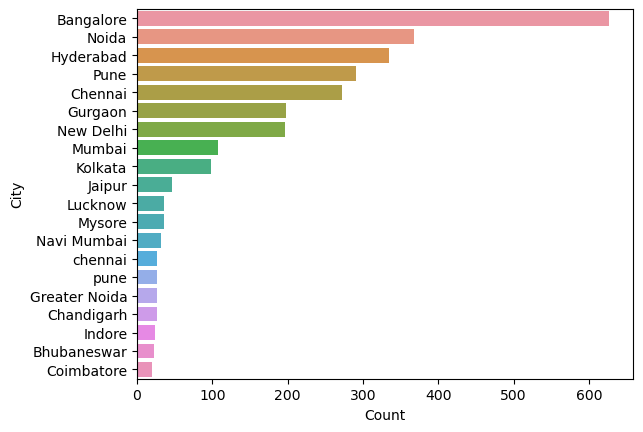

<Figure size 1000x1000 with 0 Axes>

In [180]:
sns.barplot(data=JobCity_df, x='Count', y='City', order=JobCity_df['City'])

plt.figure(figsize=(10, 10))

plt.show()

Bangalore is the city that has the highest number of jobs available to Engineers

### State Of College

In [186]:
count=df['CollegeState'].value_counts()
CollegeState_count=count.head(20)
CollegeState_df=CollegeState_count.to_frame().reset_index()
CollegeState_df.columns=['CollegeState','Count']

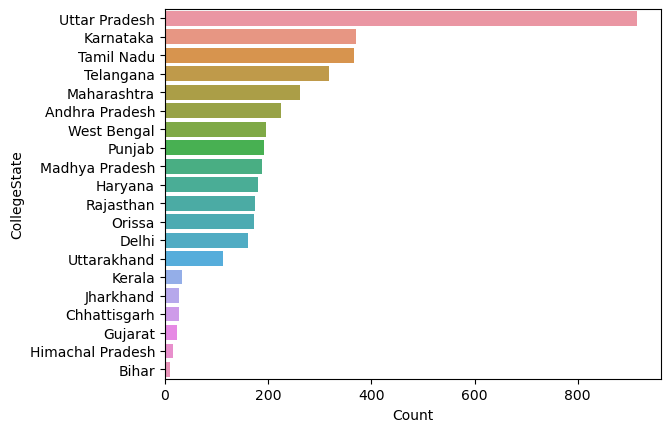

<Figure size 1000x1000 with 0 Axes>

In [188]:
sns.barplot(data=CollegeState_df, x='Count', y='CollegeState', order=CollegeState_df['CollegeState'])

plt.figure(figsize=(10, 10))

plt.show()

Most Colleges attended by Engineering Students are in Uttar Pradesh and Karnataka

### Degree

In [295]:
degree_count = df1['Degree'].value_counts()
degree_count

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

Only 9% of the students have a Masters Degree

### Specialization

In [297]:
specialization_count = df['Specialization'].value_counts()
specialization_count[:20]


electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

Text(0.5, 1.0, 'Specialization pursued by the candidate')

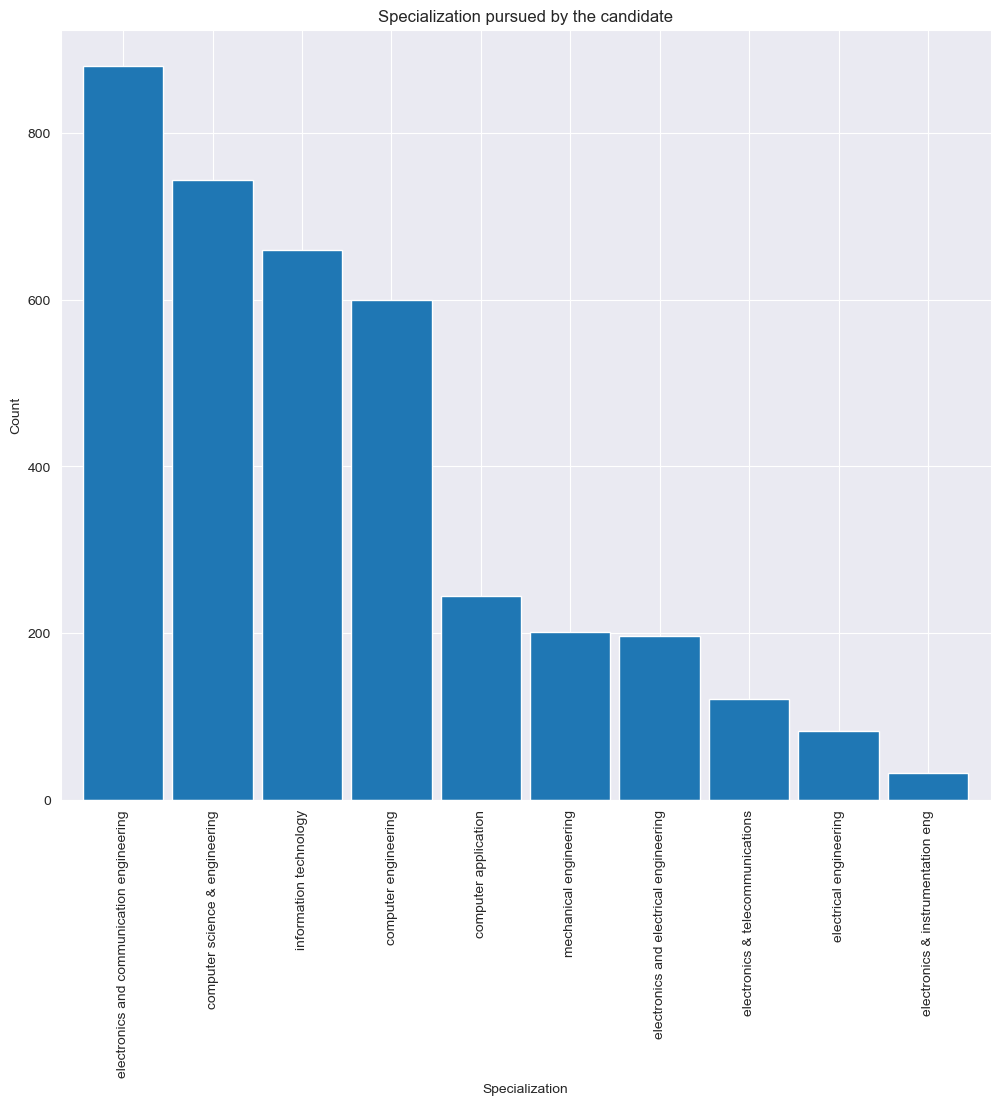

In [298]:
#Plotting the most frequent specialization
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
specialization_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Specialization pursued by the candidate')


Electronics and Communication engineering/Computer science  and Engineering majors have the most students

### Graduation Board

In [302]:
Graduationboard_count = df['Graduation_board'].value_counts()

Text(0, 0.5, 'Count')

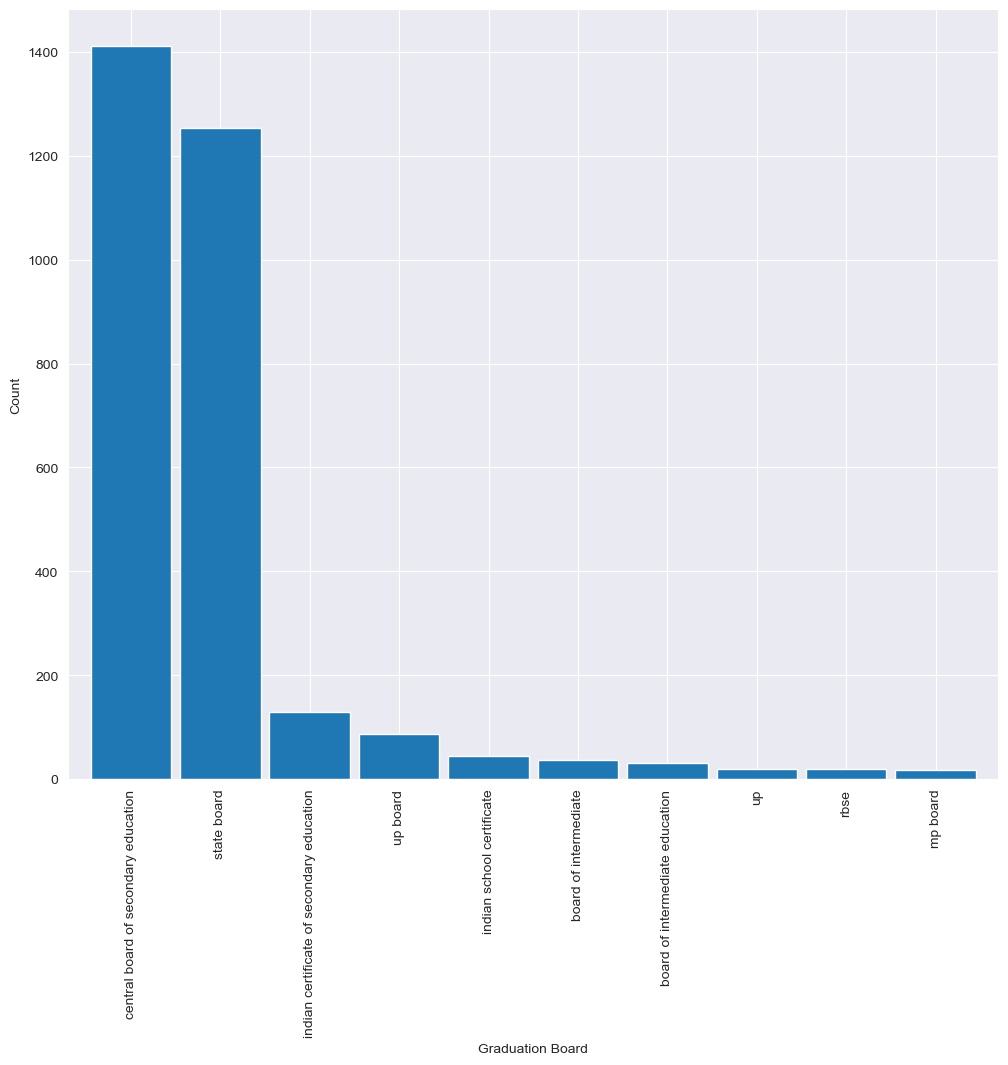

In [301]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
Graduationboard_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Graduation Board')
plt.ylabel('Count')


The central board of secondary education and the state board are the graduation boards used frequently

### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

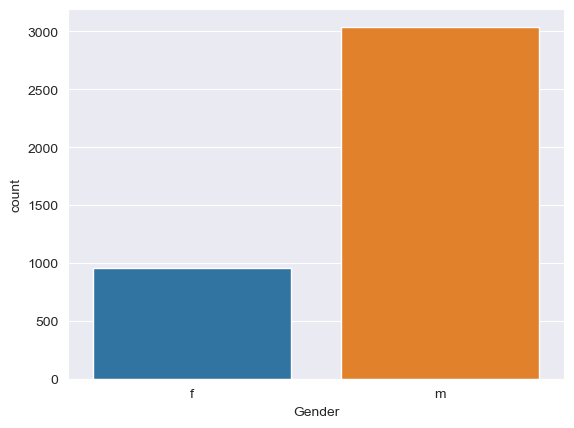

In [312]:
sns.countplot(x ="Gender",data = df1)

There are more males than females in the field

## Bivariate Analysis

### Duration Of Jobs

In [192]:
JobDuration_df=df1[['DOJ','DOL']]

In [195]:
JobDuration_df.head()

,DOJ,DOL
0,2012-06-01,present
1,2013-09-01,present
2,2014-06-01,present
3,2011-07-01,present
4,2014-03-01,2015-03-01 00:00:00


In [199]:
len(JobDuration_df[JobDuration_df['DOL']=='present'])

1875

In [200]:
len(JobDuration_df)

3998

In [203]:
not_presentdf=JobDuration_df[JobDuration_df['DOL']!='present']

In [204]:
pd.to_datetime(not_presentdf['DOL'])

4      2015-03-01
6      2015-05-01
7      2015-07-01
10     2015-04-01
11     2014-10-01
          ...    
3991   2014-10-01
3992   2015-04-01
3993   2012-10-01
3994   2013-07-01
3996   2015-01-01
Name: DOL, Length: 2123, dtype: datetime64[ns]

In [208]:
not_presentdf.head(5)

,DOJ,DOL
4,2014-03-01,2015-03-01 00:00:00
6,2014-08-01,2015-05-01 00:00:00
7,2014-07-01,2015-07-01 00:00:00
10,2011-04-01,2015-04-01 00:00:00
11,2011-08-01,2014-10-01 00:00:00


In [223]:
not_presentdf['DOL']= pd.to_datetime(not_presentdf['DOL'])
not_presentdf['DOL']= pd.to_datetime(not_presentdf['DOL'])

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_59740/3841498328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_presentdf['DOL']= pd.to_datetime(not_presentdf['DOL'])
/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_59740/3841498328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_presentdf['DOL']= pd.to_datetime(not_presentdf['DOL'])


In [224]:
not_presentdf['duration']=not_presentdf['DOL']-not_presentdf['DOJ']

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_59740/3970094264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_presentdf['duration']=not_presentdf['DOL']-not_presentdf['DOJ']


In [252]:
not_presentdf['days'] = not_presentdf['duration'].astype(str).str.split(' ').str[0]


/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_59740/3554449131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_presentdf['days'] = not_presentdf['duration'].astype(str).str.split(' ').str[0]


In [253]:
not_presentdf.head(30)

,DOJ,DOL,duration,days
4,2014-03-01,2015-03-01,365 days,365
6,2014-08-01,2015-05-01,273 days,273
7,2014-07-01,2015-07-01,365 days,365
10,2011-04-01,2015-04-01,1461 days,1461
11,2011-08-01,2014-10-01,1157 days,1157
17,2013-08-01,2014-09-01,396 days,396
18,2014-01-01,2014-06-01,151 days,151
20,2010-11-01,2012-09-01,670 days,670
21,2012-08-01,2013-12-01,487 days,487
22,2013-10-01,2015-04-01,547 days,547


In [260]:
not_presentdf.loc[:, 'days'] = not_presentdf['days'].astype(int)

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_59740/4167918857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_presentdf.loc[:, 'days'] = not_presentdf['days'].astype(int)


In [259]:
not_presentdf['days'].describe()
#there are some job durations less than 0 day which doesn't make sense

count    2123.000000
mean      460.486576
std       362.710252
min      -303.000000
25%       184.000000
50%       365.000000
75%       641.000000
max      2192.000000
Name: days, dtype: float64

In [263]:
#drop the days that are less than 0
not_presentdf=not_presentdf.drop(not_presentdf[not_presentdf['days']<0].index)

In [264]:
not_presentdf['days'].describe()

count    2083.000000
mean      472.449832
std       355.520842
min         0.000000
25%       212.000000
50%       365.000000
75%       669.000000
max      2192.000000
Name: days, dtype: float64

Highest duration of stay at a job is 2,192 for those not working currently, with the average at 472 days

## Salary Per Designation

In [267]:
salary_per_designation=df1.groupby('Designation')['Salary'].mean()

In [269]:
salary_per_designation.to_frame().reset_index()
salary_per_designation.columns=['Designation','Average_Salary']

In [293]:
sorted_df = salary_per_designation.sort_values( ascending=False)
top10_salaries=sorted_df[:10]

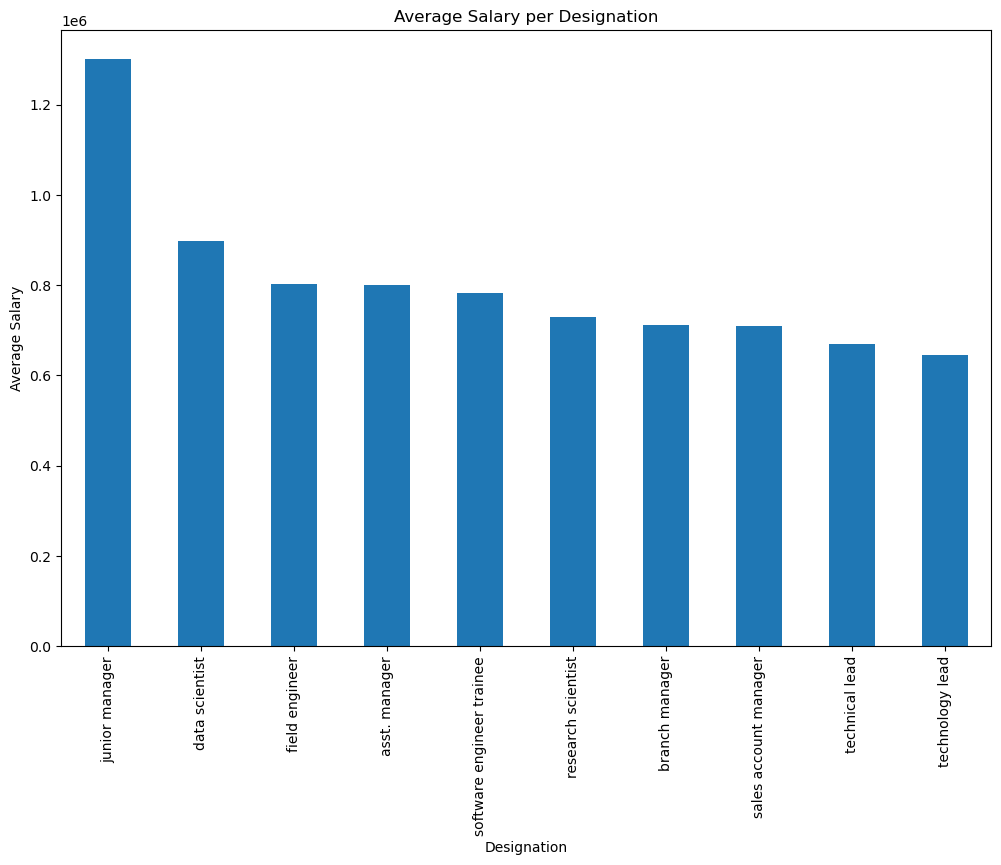

In [294]:
top10_salaries.plot(x='Designation', y='Salary', kind='bar', figsize=(12,8))
plt.title('Average Salary per Designation')
plt.xlabel('Designation')
plt.ylabel('Average Salary')
plt.show()


The junior manager and data scientist roles pay the highest averagely

### Salary by Gender

In [308]:
df1.groupby('Gender')['Salary'].median()

Gender
f    300000.0
m    300000.0
Name: Salary, dtype: float64

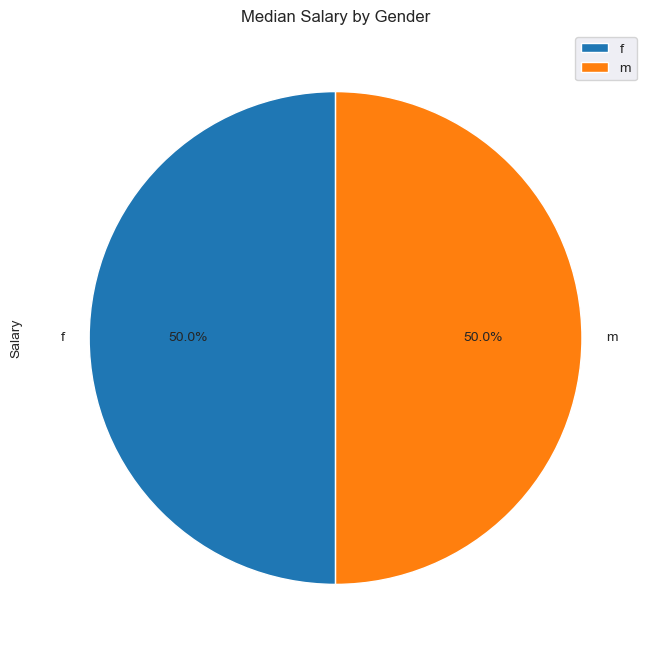

In [309]:
gender_salary_median = df1.groupby('Gender')['Salary'].median()
gender_salary_median.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90)
plt.title('Median Salary by Gender')
plt.legend()
plt.show()

The salary compensation is similar in both genders

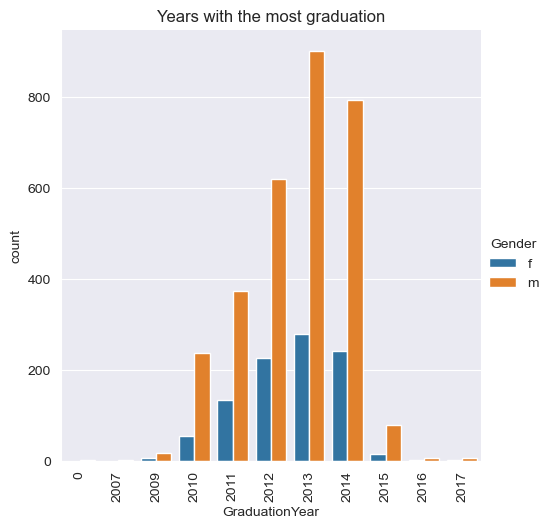

In [335]:
sns.catplot(x = "GraduationYear",hue="Gender",data = df1,kind='count')
plt.xticks(rotation=90)
plt.title('Years with the most graduation')
plt.show()


### Salary by Degree

In [317]:
degree_salary_median = df1.groupby('Degree')['Salary'].median()
degree_salary_median

Degree
B.Tech/B.E.      300000.0
M.Sc. (Tech.)    320000.0
M.Tech./M.E.     340000.0
MCA              220000.0
Name: Salary, dtype: float64

In [318]:
df1.groupby('Degree')['Salary'].mean()

Degree
B.Tech/B.E.      308622.702703
M.Sc. (Tech.)    320000.000000
M.Tech./M.E.     366132.075472
MCA              280802.469136
Name: Salary, dtype: float64

Masters of Technology annd Engineering earn the highest averagely

### Performance Based on College Tier

In [329]:
df1['SumofGrades']= df1['English']+df1['Logical']+df1['Quant']

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_59740/3374582548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SumofGrades']= df1['English']+df1['Logical']+df1['Quant']


In [330]:
df1['SumofGrades']

0       1625
1       2085
2       1530
3       1845
4       1635
        ... 
3993    1174
3994    1360
3995    1415
3996    1180
3997    1544
Name: SumofGrades, Length: 3998, dtype: int64

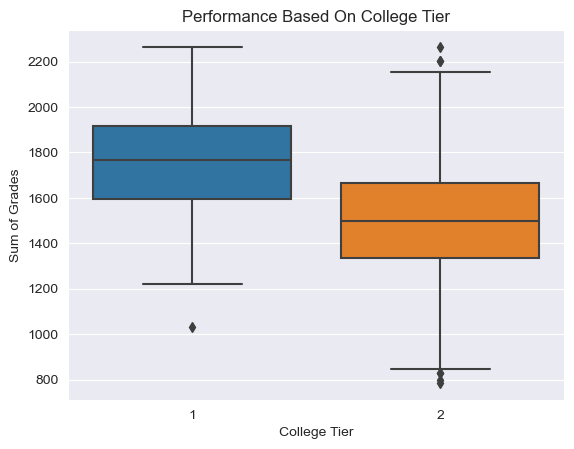

In [333]:
sns.boxplot(x='CollegeTier', y='SumofGrades', data=df1)

plt.title('Performance Based On College Tier')
plt.xlabel('College Tier')
plt.ylabel('Sum of Grades')

plt.show()


The average performance in Tier 1 colleges are higher than that of Tier 2 colleges. The spread is higher in Tier 2 colleges

### Salary based on College Tier

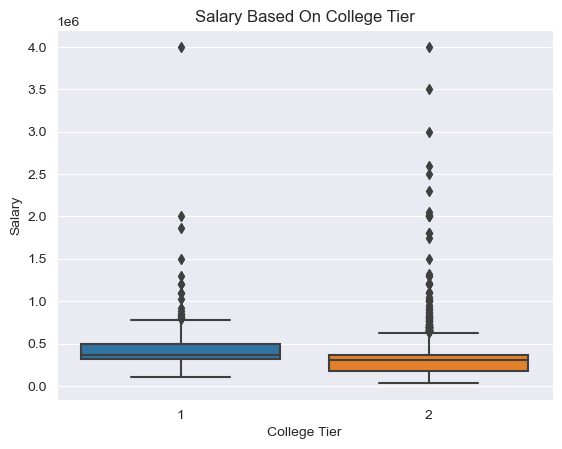

In [334]:
sns.boxplot(x='CollegeTier', y='Salary', data=df1)

plt.title('Salary Based On College Tier')
plt.xlabel('College Tier')
plt.ylabel('Salary')

plt.show()


There are more outliers in the salary of students in tier 2 colleges, without the outliers, there's little to no difference in the salary performancce based on college tier

### Salary based on specialization

In [336]:
salary_per_specialization=df1.groupby('Specialization')['Salary'].mean()
salary_per_specialization.to_frame().reset_index()
salary_per_specialization.columns=['Specialization','Average_Salary']
sorted_df = salary_per_specialization.sort_values( ascending=False)
top10_salaries_specialization=sorted_df[:10]

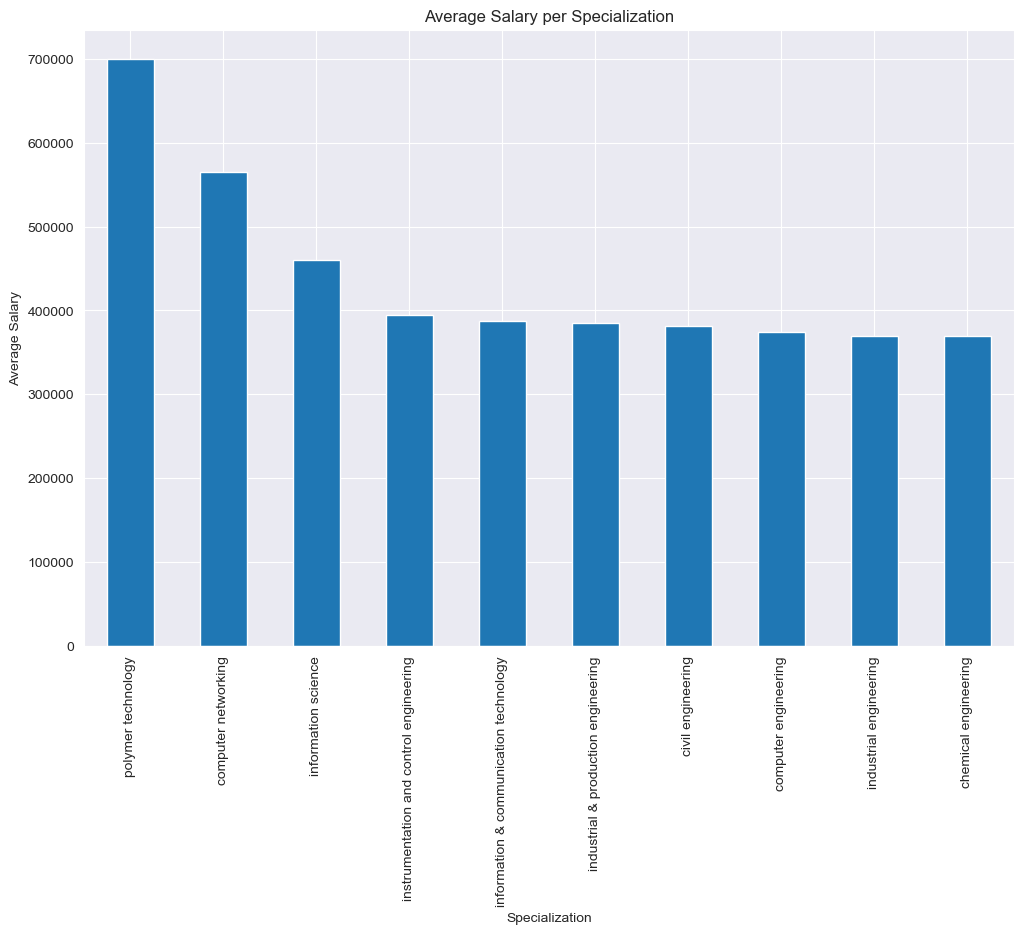

In [337]:
top10_salaries_specialization.plot(x='Specialization', y='Salary', kind='bar', figsize=(12,8))
plt.title('Average Salary per Specialization')
plt.xlabel('Specialization')
plt.ylabel('Average Salary')
plt.show()


In [343]:
df1.groupby('Specialization')['Salary'].median().sort_values(ascending=False)[:10]

Specialization
polymer technology                        700000.0
computer networking                       565000.0
information science                       460000.0
information & communication technology    387500.0
industrial & production engineering       382500.0
chemical engineering                      375000.0
industrial engineering                    370000.0
internal combustion engine                360000.0
telecommunication engineering             350000.0
computer engineering                      350000.0
Name: Salary, dtype: float64

Polymer technology is the highest paying field followed by computer networking

### Salary based on years of experience

In [363]:
df1['Years_of_Experience']=2023-df['GraduationYear']

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_59740/3042902452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Years_of_Experience']=2023-df['GraduationYear']


In [364]:
df1['Years_of_Experience']

0       12
1       11
2        9
3       12
4       11
        ..
3993    13
3994    10
3995    11
3996     9
3997    11
Name: Years_of_Experience, Length: 3998, dtype: int64

In [366]:
df1['Years_of_Experience'].describe()

count    3998.000000
mean       10.894197
std        31.857271
min         6.000000
25%         9.000000
50%        10.000000
75%        11.000000
max      2023.000000
Name: Years_of_Experience, dtype: float64

In [362]:
df1[df1['GraduationYear']==0]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,Grade10_marks,Grade10_board,Graduation_year,Graduation_marks,Graduation_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,SumofGrages,SumofGrades,Years_of_Experience
2664,794381,325000,2014-07-01,2015-07-01 00:00:00,system engineer,Chandigarh,m,1991-12-17,89.0,central board of secondary education,2010,85.2,central board of secondary education,8346,2,B.Tech/B.E.,mechanical engineering,68.76,8346,0,Uttar Pradesh,0,695,655,680,0.755375,2030,2030,True


In [367]:
df1= df1.drop(df1[df1['GraduationYear']==0].index)

In [368]:
df1['Years_of_Experience'].describe()

count    3997.000000
mean       10.390793
std         1.315533
min         6.000000
25%         9.000000
50%        10.000000
75%        11.000000
max        16.000000
Name: Years_of_Experience, dtype: float64

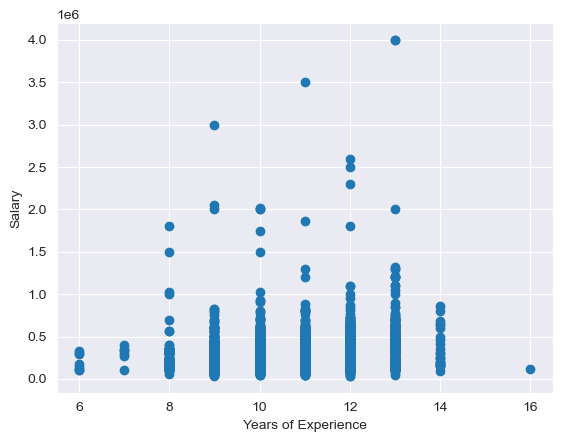

In [370]:
plt.scatter(df1['Years_of_Experience'],df1['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [371]:
df1['Years_of_Experience'].corr(df1['Salary'])

0.21234738085829513

There's little correlation between the Years of experience and salary

## Research Questions

- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
- Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

In [ ]:
#to test the first claim, we'll compare the salary of students with the minimum years of experience

### Salary For Freshers

In [373]:
df1[df1['Years_of_Experience']==6]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,Grade10_marks,Grade10_board,Graduation_year,Graduation_marks,Graduation_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,SumofGrages,SumofGrades,Years_of_Experience
379,561757,120000,2013-11-01,2014-03-01 00:00:00,software developer,New Delhi,m,1992-12-03,64.00,central board of secondary education,2009,57.00,central board of secondary education,7515,2,B.Tech/B.E.,computer engineering,60.34,7515,0,Uttarakhand,2017,430,460,485,0.377551,1375,1375,6
728,713751,100000,2013-11-01,2014-04-01 00:00:00,software developer,NaN,f,1991-11-12,75.60,state board,2009,81.30,central board of secondary education,75,2,B.Tech/B.E.,computer science & engineering,76.56,75,0,Uttar Pradesh,2017,555,415,515,0.793581,1485,1485,6
2018,1010140,330000,2014-06-01,2015-01-01 00:00:00,system engineer,Bhubaneshwar,m,1991-06-11,89.76,indian certificate of secondary education,2009,82.00,central board of secondary education,8440,1,B.Tech/B.E.,electronics and instrumentation engineering,72.00,8440,0,Orissa,2017,595,590,665,0.849803,1850,1850,6
2800,1123174,290000,2014-07-01,present,associate system engineer,Noida,m,1991-08-01,76.00,state board,2009,71.00,state board,8287,2,B.Tech/B.E.,computer science & engineering,68.00,8287,1,West Bengal,2017,510,370,430,0.356536,1310,1310,6
3036,663821,180000,2013-12-01,2014-06-01 00:00:00,site engineer,New Delhi,m,1991-05-24,68.60,central board of secondary education,2008,59.20,central board of secondary education,4450,2,B.Tech/B.E.,electronics and electrical engineering,67.90,4450,0,Uttar Pradesh,2017,275,350,400,0.163631,1025,1025,6
3229,1242790,100000,2015-01-01,2015-04-01 00:00:00,software development engineer,Faridabad,m,1993-08-15,70.00,central board of secondary education,2011,58.00,central board of secondary education,6907,2,B.Tech/B.E.,information technology,70.00,6907,0,Haryana,2017,440,435,380,0.237803,1255,1255,6
3370,820353,300000,2014-06-01,2015-01-01 00:00:00,project manager,Panchkula,m,1991-03-03,90.00,central board of secondary education,2009,81.20,central board of secondary education,11127,1,B.Tech/B.E.,electronics and electrical engineering,70.30,11127,0,Punjab,2017,730,585,720,0.557390,2035,2035,6
3735,920335,145000,2014-08-01,present,analyst,Noida,m,1990-07-02,64.00,state board,2009,60.01,state board,55,2,B.Tech/B.E.,electronics and communication engineering,60.00,55,0,Uttar Pradesh,2017,500,425,250,0.053160,1175,1175,6


In [374]:
freshers_df=df1[df1['Years_of_Experience']==6]

In [376]:
sample=freshers_df['Salary']
print(sample)

379     120000
728     100000
2018    330000
2800    290000
3036    180000
3229    100000
3370    300000
3735    145000
Name: Salary, dtype: int64


In [385]:
import scipy.stats as stats

sample = [120000, 100000, 330000, 290000, 180000, 100000, 300000, 145000]

null_hypothesis = [250000, 300000]  # Population mean is between 2.5 to 3 lakh

# Calculating sample mean and standard deviation
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# Calculating the standard error of the mean
standard_error = sample_std / np.sqrt(len(sample))

# Calculating the confidence interval
confidence_level = 0.95
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=len(sample)-1)
lower_ci = sample_mean - t_critical * standard_error
upper_ci = sample_mean + t_critical * standard_error

# Comparing the confidence interval to the null hypothesis
if null_hypothesis[0] <= lower_ci <= upper_ci <= null_hypothesis[1]:
    print(f'Fail to reject the null hypothesis. The population mean salary for people with 6 years of experience is '
          f'between {null_hypothesis[0]} and {null_hypothesis[1]} lakh with {confidence_level*100}% confidence.')
else:
    print(f'Reject the null hypothesis. The population mean salary for people with 6 years of experience is not '
          f'between {null_hypothesis[0]} and {null_hypothesis[1]} lakh with {confidence_level*100}% confidence.')


Reject the null hypothesis. The population mean salary for people with 6 years of experience is not between 250000 and 300000 lakh with 95.0% confidence.


### Relationship between Gender and Specialization

In [387]:
# Create a contingency table
contingency_table = pd.crosstab(df1['Gender'], df1['Specialization'])

chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

alpha = 0.05

if p_val < alpha:
    print("There is evidence of a relationship between gender and specialization.")
else:
    print("There is no evidence of a relationship between gender and specialization.")

There is evidence of a relationship between gender and specialization.


My Hypotheses; 
- The performance of students in colleges is not better than their performance in graduation year

- People with a masters degree earn more salary

### Performance in College and in Graduating year

In [392]:
sampledf=df1.sample(10)

In [398]:
sampledf[['Graduation_marks','collegeGPA']]

,Graduation_marks,collegeGPA
1737,63.40,76.40
3373,69.89,66.50
757,46.00,64.56
3139,77.33,75.67
3535,91.40,70.50
148,71.20,64.46
3747,68.17,67.89
2570,65.40,64.90
2885,72.48,59.70
3979,65.66,77.50


In [399]:
graduation_marks_sample=sampledf['Graduation_marks']
collegeGPA_sample=sampledf['collegeGPA']

In [401]:
from scipy.stats import ttest_rel

null_hypothesis = 'The performance of students in colleges is not better than their performance in graduation year'
alternative_hypothesis = 'The performance of students in colleges is better than their performance in graduation year'

significance_level = 0.05

t_statistic, p_value = ttest_rel(collegeGPA_sample, graduation_marks_sample)

if p_value <= significance_level:
    print(f'Reject the null hypothesis in favor of the alternative hypothesis. '
          f'{alternative_hypothesis}.')
else:
    print(f'Fail to reject the null hypothesis. {null_hypothesis}.')

Fail to reject the null hypothesis. The performance of students in colleges is not better than their performance in graduation year.


### Relationship Between Degree and Salary

In [416]:
no_masters=df1[df1['Degree']=='B.Tech/B.E.'].sample(20)['Salary']

In [417]:
masters=df1[df1['Degree']=='M.Tech./M.E.'].sample(20)['Salary']

In [419]:
from scipy.stats import ttest_ind


alternative_hypothesis = "People with masters degree earn the same salary as people without masters degree"
null_hypothesis = "People with masters degree earn more salary than people without masters degree"

significance_level = 0.05

t_statistic, p_value = ttest_ind(masters, no_masters)

if p_value <= significance_level:
    print(f"Reject the null hypothesis in favor of the alternative hypothesis. {alternative_hypothesis}")
else:
    print(f"Fail to reject the null hypothesis. {null_hypothesis}")


Fail to reject the null hypothesis. People with masters degree earn more salary than people without masters degree


## Feature Transformation

In [420]:
df1.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,Grade10_marks,Grade10_board,Graduation_year,Graduation_marks,Graduation_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,SumofGrages,SumofGrades,Years_of_Experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board of secondary education, andhra pradesh",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,1625,1625,12
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,central board of secondary education,2007,85.0,central board of secondary education,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,2085,2085,11
2,810601,325000,2014-06-01,present,system engineer,Chennai,f,1992-08-03,85.0,central board of secondary education,2010,68.2,central board of secondary education,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,1530,1530,9
3,267447,1100000,2011-07-01,present,software developer,Gurgaon,m,1989-12-05,85.6,central board of secondary education,2007,83.6,central board of secondary education,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,1845,1845,12
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,central board of secondary education,2008,76.8,central board of secondary education,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,1635,1635,11


#### Transformation on Gender,Degree,Salary,Graduation Marks,College GPA 

In [423]:
# Column standardization on Salary using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_salary = scaler.fit_transform(df1['Salary'].values.reshape(-1,1))

print(scaled_salary[:10])

[[0.09709962]
 [0.11727617]
 [0.07313997]
 [0.26860025]
 [0.04161412]
 [0.0668348 ]
 [0.0668348 ]
 [0.09205549]
 [0.14249685]
 [0.04918033]]


In [424]:
#standardization for graduation grades
scaled_graduation_marks = scaler.fit_transform(df1['Graduation_marks'].values.reshape(-1,1))

print(scaled_graduation_marks[:10])

[[0.95059625]
 [0.76660988]
 [0.48040886]
 [0.7427598 ]
 [0.62691652]
 [0.80068143]
 [0.46848382]
 [0.86882453]
 [0.87223169]
 [0.54855196]]


In [425]:
#standardization for college GPA
scaled_graduation_marks = scaler.fit_transform(df1['collegeGPA'].values.reshape(-1,1))

print(scaled_graduation_marks[:10])

[[0.76540436]
 [0.68046641]
 [0.67982456]
 [0.72946085]
 [0.72154472]
 [0.74743261]
 [0.71170304]
 [0.02278562]
 [0.84060762]
 [0.76540436]]


In [426]:
# one-hot Encoding for Gender 
gender_dummies = pd.get_dummies(df1[['Gender']])
gender_dummies

,Gender_f,Gender_m
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
3993,0,1
3994,1,0
3995,0,1
3996,1,0


In [427]:
# one-hot Encoding for Degree
degree_dummies = pd.get_dummies(df1[['Degree']])
degree_dummies

,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
3993,1,0,0,0
3994,1,0,0,0
3995,1,0,0,0
3996,1,0,0,0
